## Analyzing biased Fandango's rating system for movies

The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fandango_before=pd.read_csv('fandango_score_comparison.csv')
fandango_after=pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango_before_filter=fandango_before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [3]:
fandango_before_filter.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [4]:
fandango_after_filter=fandango_after[['movie', 'year', 'fandango']]

In [5]:
fandango_after_filter.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [6]:
fandango_before.head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5


Since the movies are different before and after the analysis and before was in 2015 and after was in 2016. Sowe will have to change the goal of our analysis.We changed our goal to finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

In [8]:
fandango_before

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [13]:
fandango_after_filter.sample(10,random_state=1)['movie']

108                     Mechanic: Resurrection
206                                   Warcraft
106                                  Max Steel
107                              Me Before You
51     Fantastic Beasts and Where to Find Them
33                                        Cell
59                                      Genius
152                                      Sully
4                      A Hologram for the King
31                  Captain America: Civil War
Name: movie, dtype: object

In [14]:
fandango_after.columns

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

Movie	Fan ratings
Mechanic: Resurrection	2247
Warcraft	7271
Max Steel	493
Me Before You	5263
Fantastic Beasts and Where to Find Them	13400
Cell	17
Genius	127
Sully	11877
A Hologram for the King	500
Captain America: Civil War	35057

In [18]:
fandango_before_filter[fandango_before_filter['Fandango_votes']<30]

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference


All the movies in the before analysis are popular

# Seperating the 2015 and 2016 released movies

In [26]:
fandango_before_filter['Year']=fandango_before_filter['FILM'].str.extract(r'(\d\d\d\d)')
fandango_before_filter['Year'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



2015    129
2014     17
Name: Year, dtype: int64

In [29]:
fandango_2015=fandango_before_filter[fandango_before_filter['Year']=='2015']

In [31]:
fandango_2016=fandango_after_filter[fandango_after_filter['year']==2016]

In [33]:
fandango_after_filter['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

In [34]:
fandango_2015.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


Fandango stars is the actual rating visible to users and Fandango rating value i sthe one wich is visible in th HTML page

In [36]:
fandango_2016.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


([<matplotlib.axis.XTick at 0x7fe650f5ecf8>,
 <a list of 11 Text xticklabel objects>)

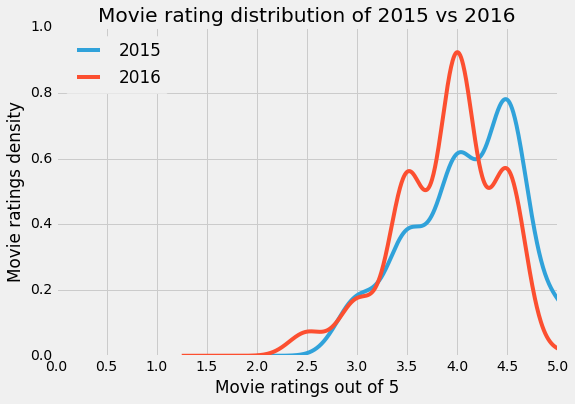

In [50]:
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.\
kde(label='2015',legend=True,figsize=(8,5.5))
fandango_2016['fandango'].plot.kde(label='2016',legend=True)
plt.title('Movie rating distribution of 2015 vs 2016')
plt.xlabel('Movie ratings out of 5')
plt.ylabel('Movie ratings density')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

Movies in 2016 were rated lower than 2015

Both distributions are strongly left skewed.
The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.
The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a

In [55]:
print('Following is the frequency distribution for 2015')
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

Following is the frequency distribution for 2015


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [56]:
print('Following is the frequency distribution for 2016')
fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100

Following is the frequency distribution for 2016


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

In [77]:
mean_2015=fandango_2015['Fandango_Stars'].mean()
median_2015=fandango_2015['Fandango_Stars'].median()
mode_2015=fandango_2015['Fandango_Stars'].mode()[0]
mean_2016=fandango_2016['fandango'].mean()
median_2016=fandango_2016['fandango'].median()
mode_2016=fandango_2016['fandango'].mode()[0]

In [78]:
print(median_2015)

4.0


In [81]:
df=pd.DataFrame()
df['2015']=[mean_2015,median_2015,mode_2015]
df['2016']=[mean_2016,median_2016,mode_2016]
df

,2015,2016
0,4.085271,3.887435
1,4.000000,4.000000
2,4.500000,4.000000


In [85]:
df.index=['Mean','Median','Mode']
df

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


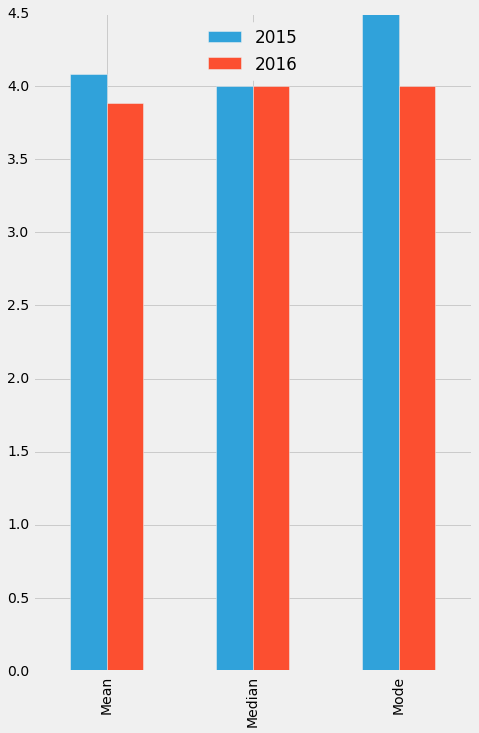

In [90]:
df.plot.bar(figsize=(7,11))

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.